# Decision Tree Model

## Data Preprocessing

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier

# Set working directory
month_file = '3_July'
# Set working directory
os.chdir("/Users/mau/Library/CloudStorage/Dropbox/Mac/Documents/Dissertation/Chapter 2/Entire_Data/By month/"+month_file+"/Ending Balances/Per_Player")

## Top Players

In [11]:
# Filter Columns
filter = ['gender', 'age_gen', 'day', 'timeofday', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance',  'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']


# Load dataset
dataset = pd.read_parquet('top_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3, 4, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 25:] = sc.fit_transform(X_train[:, 25:])
X_test[:, 25:] = sc.transform(X_test[:, 25:])


classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[162 134]
 [149 337]]
Accuracy:  0.6381074168797954
Precision:  0.6181996299861415
Recall:  0.6203564675786898
F1 Score:  0.6190284369571991


### Which IDVs have the most weight in the model

In [12]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'day', 3: 'timeofday', 4: 'first_outcome', 5: 'first_wager', 6: 'first_p/b', 7: 'last_outcome', 8: 'last_wager', 9: 'last_p/b', 10: 'beginning_amt', 11: 'ending_amt', 12: 'ending_balance', 13: 'ave_slotdenom', 14: 'std_slotdenom', 15: 'min_slotdenom', 16: 'max_slotdenom', 17: 'ave_theo_payback', 18: 'min_theo_payback', 19: 'max_theo_payback', 20: 'ave_wageramt', 21: 'std_wageramt', 22: 'min_wager', 23: 'max_wager', 24: 'ave_p/b', 25: 'std_p/b', 26: 'max_p/b', 27: 'max_profit', 28: 'depletion_slope', 29: '#inc_slotdenom', 30: '#dec_slotdenom', 31: '#inc_maxbet', 32: '#dec_maxbet', 33: '#W', 34: '#L', 35: '#NH', 36: '#D', 37: '#2ws', 38: '#3ws', 39: '#4ws', 40: 'w/min', 41: 'l/min', 42: '2ws/min', 43: '3ws/min', 44: '4ws/min', 45: 'nh/min', 46: 'd/min', 47: 'w/g', 48: 'l/g', 49: 'nh/g', 50: 'd/g', 51: 'ave_time_per_gamble', 52: 'min_time_per_gamble', 53: 'max_time_per_gamble', 54: 'machines_changes', 55: 'unique_machines', 56: 'ave_time_per_machine', 57: 't

In [13]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x40: 0.24462227912932138
encoder__x3_night: 0.1788732394366197
remainder__x57: 0.08297055057618437
encoder__x3_evening: 0.08169014084507041
remainder__x51: 0.07592829705505763
remainder__x53: 0.07173495518565944
remainder__x58: 0.06667733674775929
remainder__x36: 0.05300896286811779
remainder__x41: 0.048079385403329046
remainder__x24: 0.04708706786171575
remainder__x11: 0.04619078104993597
remainder__x56: 0.04532650448143407
remainder__x10: 0.045038412291933415
remainder__x47: 0.04379001280409732
remainder__x17: 0.04212548015364916
remainder__x26: 0.039276568501920614
remainder__x14: 0.03911651728553136
remainder__x45: 0.028969270166453277
remainder__x34: 0.027912932138284264
remainder__x48: 0.027528809218950047
remainder__x35: 0.026696542893726007
remainder__x25: 0.02618437900128041
remainder__x22: 0.025512163892445584
remainder__x43: 0.024999999999999988
remainder__x27: 0.024551856594110112
remainder__x18: 0.019750320102432793
remainder__x28: 0.017541613316261195
remainder

## Cumulative Accuracy Profile (CAP) Graph

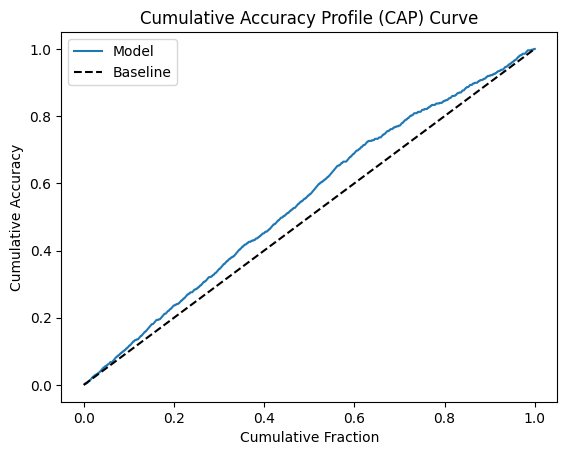

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()

## Bottom Players

In [15]:
# Filter Columns
filter = ['gender', 'age_gen', 'day', 'timeofday', 'first_outcome',
        'first_wager','first_p/b', 'last_outcome', 'last_wager', 'last_p/b',
        'beginning_amt', 'ending_amt', 'ending_balance',  'ave_slotdenom', 
        'std_slotdenom', 'min_slotdenom', 'max_slotdenom', 'ave_theo_payback',
        'min_theo_payback', 'max_theo_payback', 'ave_wageramt', 'std_wageramt',
        'min_wager', 'max_wager', 'ave_p/b', 'std_p/b', 'max_p/b', 'max_profit', 'depletion_slope', 
        '#inc_slotdenom', '#dec_slotdenom', '#inc_maxbet', '#dec_maxbet', 
        '#W', '#L', '#NH', '#D', '#2ws', '#3ws', '#4ws',
        'w/min', 'l/min', '2ws/min', '3ws/min', '4ws/min',
        'nh/min', 'd/min', 'w/g', 'l/g', 'nh/g', 'd/g', 
        'ave_time_per_gamble', 'min_time_per_gamble', 'max_time_per_gamble',
        'machines_changes', 'unique_machines', 'ave_time_per_machine',
        'total_duration', 'total_gambles', 'continue_playing']


# Load dataset
dataset = pd.read_parquet('ntop_players_continuation_by_session.parquet', columns=filter)

# # Seperate dependent and independent variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

# Econde gender column (Binary)
le = LabelEncoder()

# Binary Encode gender
X[:, 0] = le.fit_transform(X[:, 0])

# # Encode age_generartion, first_outoce, last_outcome columns
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2, 3, 4, 7])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

sc = StandardScaler()

# Scale all columns except the encoded ones
X_train[:, 25:] = sc.fit_transform(X_train[:, 25:])
X_test[:, 25:] = sc.transform(X_test[:, 25:])


classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred, average='macro'))
print('Recall: ', recall_score(y_test, y_pred, average='macro'))
print('F1 Score: ', f1_score(y_test, y_pred, average='macro'))

[[1836  606]
 [ 507  322]]
Accuracy:  0.6597370834607154
Precision:  0.5652967570312155
Recall:  0.5701312673568404
F1 Score:  0.5669659918320449


In [16]:
# Create a dictionary mapping column names to their index positions
column_index_mapping = {index: column_name for index, column_name in enumerate(dataset.columns)}

# Print the dictionary
print(column_index_mapping)

{0: 'gender', 1: 'age_gen', 2: 'day', 3: 'timeofday', 4: 'first_outcome', 5: 'first_wager', 6: 'first_p/b', 7: 'last_outcome', 8: 'last_wager', 9: 'last_p/b', 10: 'beginning_amt', 11: 'ending_amt', 12: 'ending_balance', 13: 'ave_slotdenom', 14: 'std_slotdenom', 15: 'min_slotdenom', 16: 'max_slotdenom', 17: 'ave_theo_payback', 18: 'min_theo_payback', 19: 'max_theo_payback', 20: 'ave_wageramt', 21: 'std_wageramt', 22: 'min_wager', 23: 'max_wager', 24: 'ave_p/b', 25: 'std_p/b', 26: 'max_p/b', 27: 'max_profit', 28: 'depletion_slope', 29: '#inc_slotdenom', 30: '#dec_slotdenom', 31: '#inc_maxbet', 32: '#dec_maxbet', 33: '#W', 34: '#L', 35: '#NH', 36: '#D', 37: '#2ws', 38: '#3ws', 39: '#4ws', 40: 'w/min', 41: 'l/min', 42: '2ws/min', 43: '3ws/min', 44: '4ws/min', 45: 'nh/min', 46: 'd/min', 47: 'w/g', 48: 'l/g', 49: 'nh/g', 50: 'd/g', 51: 'ave_time_per_gamble', 52: 'min_time_per_gamble', 53: 'max_time_per_gamble', 54: 'machines_changes', 55: 'unique_machines', 56: 'ave_time_per_machine', 57: 't

In [17]:
from sklearn.inspection import permutation_importance

# Assuming you have a trained classifier named 'classifier' and encoded data named 'X_encoded'
# Calculate permutation importances
result = permutation_importance(classifier, X_train, y_train, n_repeats=10, random_state=42)

# Get feature importances and feature names
importances = result.importances_mean
feature_names = ct.get_feature_names_out()

# Sort feature importances
feature_importance = list(zip(feature_names, importances))
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Print feature importances
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


remainder__x41: 0.16343551716229648
encoder__x3_night: 0.1431236144025686
remainder__x10: 0.10920418928216495
remainder__x53: 0.08159926611115359
remainder__x12: 0.07207400045868052
remainder__x34: 0.06958948092653468
remainder__x57: 0.06803761180337896
encoder__x3_evening: 0.06452870575644061
remainder__x40: 0.06111153581530464
remainder__x27: 0.05998776851922638
remainder__x20: 0.05858114823025762
remainder__x56: 0.05638712636648576
remainder__x24: 0.056249522207782274
remainder__x48: 0.048214968274596745
remainder__x11: 0.04066967357235687
remainder__x8: 0.03791759039828759
remainder__x50: 0.03788701169635349
remainder__x42: 0.03664857426802233
remainder__x58: 0.03573121320999924
remainder__x5: 0.03557067502484518
remainder__x18: 0.033934714471370676
remainder__x25: 0.033728308233315483
remainder__x51: 0.03369772953138136
remainder__x46: 0.03131259078052138
remainder__x45: 0.02924088372448591
remainder__x26: 0.028254720587111093
remainder__x33: 0.02690925770201057
remainder__x49: 0.

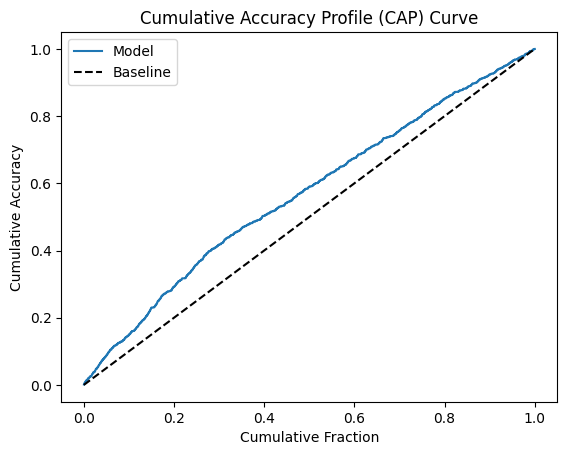

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have the predicted probabilities or scores named 'predicted_scores' and true labels named 'true_labels'

# Sort the scores and corresponding true labels
sorted_indices = np.argsort(y_pred)[::-1]
sorted_true_labels = y_test[sorted_indices]

# Calculate cumulative metrics
total_positive = np.sum(y_test)
cumulative_positives = np.cumsum(sorted_true_labels)
cumulative_accuracy = cumulative_positives / total_positive
cumulative_fraction = np.arange(1, len(sorted_true_labels) + 1) / len(sorted_true_labels)

# Create the CAP curve plot
plt.plot(cumulative_fraction, cumulative_accuracy, label='Model')
plt.plot([0, 1], [0, 1], 'k--', label='Baseline')
plt.xlabel('Cumulative Fraction')
plt.ylabel('Cumulative Accuracy')
plt.title('Cumulative Accuracy Profile (CAP) Curve')
plt.legend()
plt.show()